In [264]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import signalQ as sq
import geneddit as ge

[0.082573412, 0.202573412, 0.392292509, 0.569283521, 0.733823053, 0.886321976]
15
1.6372421824064007
[-3.2320464409653575, 0.9085259847421354, 1.0171946904685634, 1.0410365193673208, 1.2567332340323862, 1.4826816124548499, 1.5704936320956406, 1.6372421824064007, 1.8634098883429329, 2.355796943456379, 2.710350731295229, 2.9012957476237404, 8.155001201362671, 11.282780328871862, 30.305425462105017]


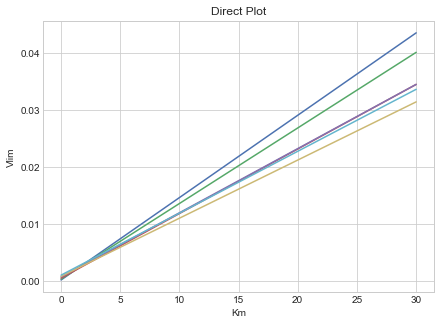

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [266]:
f = open('read_me.txt', 'rt')
a = []
v = []
for n in f:
    value = n.split('\t')
    #print(value)
    a.append(float(value[1].strip()))
    v.append(float(value[0].strip()))

print(a)
space = np.linspace(0,30,1000)
K = space

plt.figure(figsize=(7,5))

Km_list = []
for num1 in list(range(0,len(a))):
    for num2 in list(range(0,len(a))):
        if num1 != num2:
            Km = (v[num2] - v[num1])/(v[num1]/a[num1]-v[num2]/a[num2])
            if Km not in Km_list:
                Km_list.append(Km)


KM_list = sorted(Km_list)
size = len(KM_list)
print(size)

if size%2 == 0:
    Km = (KM_list[int(size/2)] + KM_list[int(size/2 +1)])/2
else:
    Km = (KM_list[int(size/2)])

print(Km)
print(KM_list)

for num in list(range(0,len(a))):
    V = K*(v[num]/a[num])
    V = [x + v[num] for x in V]
    plt.plot(K,V)
#plt.plot(Km_list)
plt.style.use('seaborn-whitegrid')
plt.ylabel('Vlim')
plt.xlabel('Km')
plt.grid(True, which = 'both')
#plt.ticklabel_format(style = 'sci')
plt.title('Direct Plot')
plt.show()

print(plt.style.available)
#V = v + (v/a)*K

In [267]:


n = ['BYG1.tsv','KOG1.tsv']
list1 = ['C00051','C00127','C00072']
list2 = ['C00062','C00256','C00121']
list3 = ['C00221','C00668','C00025','C02477']

list4 = list1 + list2 + list3

#sq.plot_cids(list3, n[1], n[0])
#sq.df_cids(list4, n[1], n[0])
#sq.plot_cids(list3, n[0], n[1])

gene = ge.readFASTA('chrXIII.fsa')[1]

primerfw = 'AAGGGGCTTTACGATGGAGT' #5' - 3'
primerrv = ge.reverse('TCCTTGCTGGATCCTTGACT') #3' - 5'

pf = ge.reverse(primerfw)
pr = ge.reverse(primerrv)
print(pr)
ge.BLAST(gene, pf)
ge.BLAST(gene, pr)
#ge.gene_size(gene, pf, pr)

#ge.amplicon(gene,pf,pr)
#cid_color('BYG1.tsv','KOG1.tsv')
Km1 = 0.5
Vlim1 = 0.0017
Km2 = 3.19
Vlim2 = 0.0042
Km3 = 2.2
Vlim3 = 0.0032

n = np.linspace(0,3,100)

@interact(i=(0,20), Kiu=(0.1,10,), Kic=(0.1,10), Kia=(0.1,10))
def inhibt(i=10, Kiu =1.2, Kic = 1.2, Kia = 1.2):

    vu = [(x*Vlim1/(1+(i/Kiu)))/((Km1/(1+(i/Kiu)))+x) for x in n] 
    vc = [(x*Vlim1/((Km1*(1+i/Kic))+x)) for x in n]
    vm = [(x*Vlim1/(1+(i/Kiu)))/(((Km1*(1+i/Kic)/(1+(i/Kiu)))+x)) for x in n]
    vs = [(x*Vlim1/((Km1+x**2/Kia+x))) for x in n]
    assintote = []
    for a in range(0,len(n)):
        assintote.append(Vlim1)

    plt.figure(figsize=(7,5))
    plt.plot(n, n*Vlim1/(Km1+n), label='uninhibited')
    plt.plot(n, vu, label ='anti-competitive')
    plt.plot(n, vc, label='competitive')
    plt.plot(n, vm, label='mixed')
    plt.plot(n, vs, label='mixed')
    #plt.plot(n, assintote, label = 'V_lim for tc')
    plt.ylabel('Initial rates (mM/s)')
    plt.xlabel('Substrate concentration (mM)')
    plt.legend()
    plt.style.use('seaborn-deep')
    plt.grid(True, which = 'both')
    plt.show()

# O valor de V/Km (app) da inibição mista é igual ao da específica, porém o Vlim é igual ao da anti-comp.

TCCTTGCTGGATCCTTGACT
TGAGGTAGCATTTCGGGGAA appears in the sequence complementary to the requested one
TCCTTGCTGGATCCTTGACT appears in the requested sequence


interactive(children=(IntSlider(value=10, description='i', max=20), FloatSlider(value=1.2, description='Kiu', …